<a href="https://colab.research.google.com/github/SDS-AAU/IntroStat/blob/master/Notebooks/AS_S4_korrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #pandas (som næsten altid)
import numpy as np #numpy hvis der skal laves mere komplekse beregninger
import seaborn as sns #seaborn til plots
 
from matplotlib import pyplot as plt #plot control
 
sns.set() #plot style
 
 
from IPython.display import HTML #Youtube embed

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Anvendt statistik S2 - Hands-on

Her kommer vi til at se på et datasæt af pingviner (man kan læse mere om data her: https://github.com/allisonhorst/palmerpenguins)

![](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

Hvis du har 2 minutter og vil vide mere om disse pingviner, så er der en kort video om dem...

In [ ]:
HTML('<iframe width="700" height="400" src="https://www.youtube-nocookie.com/embed/QS5jpQ6cpsg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [ ]:
# Vi åbner vores penvin data direkte fra github
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
# første 5 rækker
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# info viser, at der er nogle datapunkter, der mangler...
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# her sletter vi alle rækker, hvor der mangler data for en eller anden variabel

penguins = penguins.dropna()

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


## Simple frekvens beregninger

- Hvor mange han/hun pingviner?
- Hvor mange pingviner af de forskellige arter?
- Hvor mange øer er der?
- Gennemsnit for `body_mass_g` (vægt) per køn og art.


In [ ]:
# Hvor mange han/hun pengviner?
penguins.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [ ]:
# Hvor mange pengviner af de forskellige arter?
penguins.species_short.value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species_short, dtype: int64

In [ ]:
# Hvor mange øer (observationer af forskellige) er der?
penguins.island.value_counts()

Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64

In [ ]:
# Gennemsnit for body_mass_g (vægt) per køn.
penguins[penguins.sex == 'MALE'].body_mass_g.mean()

4545.684523809524

In [ ]:
penguins[penguins.sex == 'FEMALE'].body_mass_g.mean()

3862.2727272727275

In [ ]:
# Gennemsnit for body_mass_g (vægt) per art.

penguins.species_short.unique() # vi starter med at se på hvor mange unike arter der er

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
penguins.groupby(by='species_short').body_mass_g.mean() # groupby og mean er en nem måde at beregne det hele med lidt kode...

species_short
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5090.625000
Name: body_mass_g, dtype: float64

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png)

Mere om groupby og aggregation
(https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html)

## Beregning af nøgletal der beskriver fordeling

- median
- percentiler

In [ ]:
# median
penguins.body_mass_g.median()

4050.0

In [ ]:
# 25 percentil
penguins.body_mass_g.quantile(q=0.25)

3550.0

In [ ]:
# 75 percentil
penguins.body_mass_g.quantile(q=0.75)

4793.75

In [ ]:
# med numpy:

np.percentile(penguins.body_mass_g, 25)

# hvis der er manglende data, så skal vi bruge "nanpercentile" i numpy
# np.nanpercentile(penguins.body_mass_g, 25) 


3550.0

In [ ]:
# eller:

penguins.body_mass_g.describe()

count     334.000000
mean     4209.056886
std       804.836129
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4793.750000
max      6300.000000
Name: body_mass_g, dtype: float64

In [ ]:
# og det kan man også bruge i kombination med groupby!

penguins.groupby('species_short').body_mass_g.describe()

,count,mean,std,min,25%,50%,75%,max
species_short,,,,,,,,
Adelie,146.0,3706.164384,458.620135,2850.0,3362.5,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,120.0,5090.625000,499.759002,3950.0,4700.0,5050.0,5500.0,6300.0


## Visualisering af numeriske variable og fordelinger

Her kigger vi på forskellige muligheder at visualisere og præsentere fordelinger af én variable i Python med Seaborn

*   Swarmplot
*   Boxplot
* Histogram (KDE-plot) mm



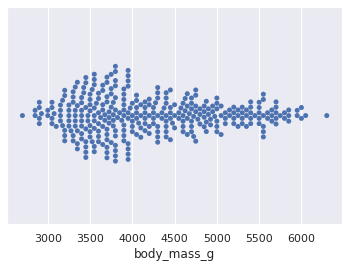

In [ ]:
# plot body_mass_g for alle pengviner som swarmplat

sns.swarmplot(penguins.body_mass_g)


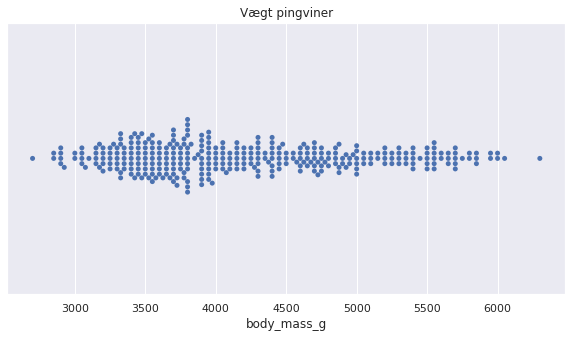

In [ ]:
#lidt større og med overskrift
plt.figure(figsize=(10,5))
plt.title('Vægt pingviner')

sns.swarmplot(penguins.body_mass_g)

En swarmplot er nok den nemmeste visualisering af en variable. Her plottes bare punkter for hver pengvin på 1 akse. Bagefer sorteres punkterne lidt...

Nedenunder er den udgave uden sortering (stripplot)

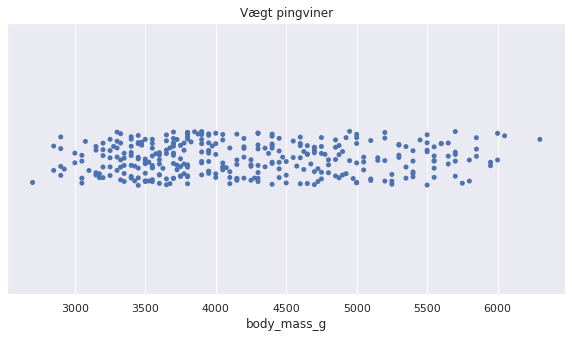

In [ ]:
#lidt større og med overskrift
plt.figure(figsize=(10,5))
plt.title('Vægt pingviner')

sns.stripplot(penguins.body_mass_g)

En swarmplot siger ikke alt for meget. Lad os prøve at lave en boxplot

![](https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png)

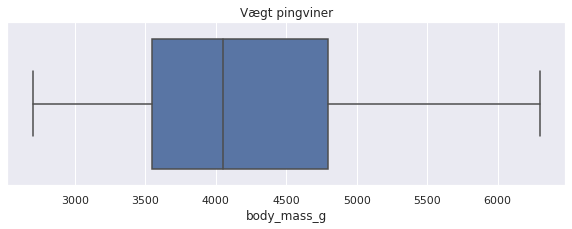

In [ ]:
plt.figure(figsize=(10,3))
plt.title('Vægt pingviner')

sns.boxplot(penguins.body_mass_g)


[Text(0.5, 0, 'Vægt i g')]

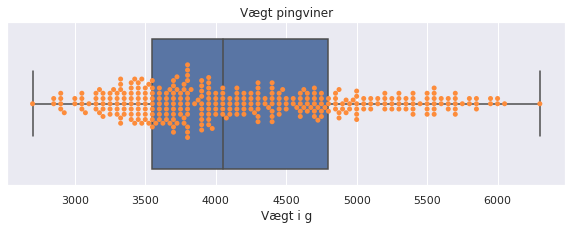

In [ ]:
plt.figure(figsize=(10,3))
plt.title('Vægt pingviner')

# to plots over hinanden
g = sns.boxplot(penguins.body_mass_g) # g = defineres for at kunne beskrive X-akse
sns.swarmplot(penguins.body_mass_g, palette='Oranges')

g.set(xlabel='Vægt i g')

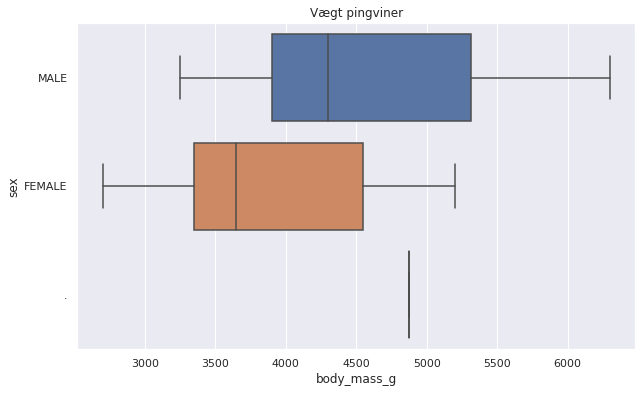

In [ ]:
# opdeling: han/hun - pingviner

plt.figure(figsize=(10,6))
plt.title('Vægt pingviner')

sns.boxplot(data = penguins, x = "body_mass_g", y = "sex")

In [ ]:
penguins.sex.unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

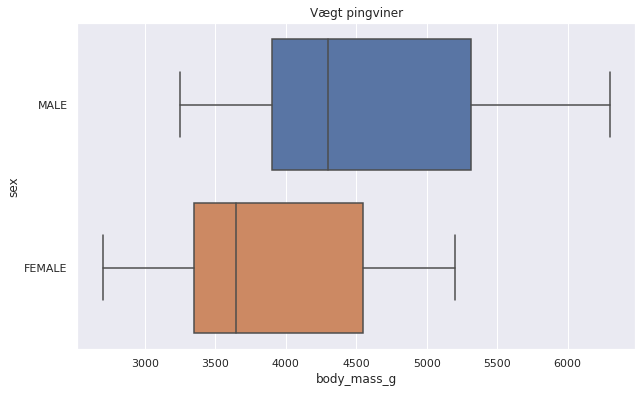

In [ ]:
# opdeling: han/hun - pingviner

plt.figure(figsize=(10,6))
plt.title('Vægt pingviner')

sns.boxplot(data = penguins[penguins.sex.isin(['MALE', 'FEMALE'])], x = "body_mass_g", y = "sex")

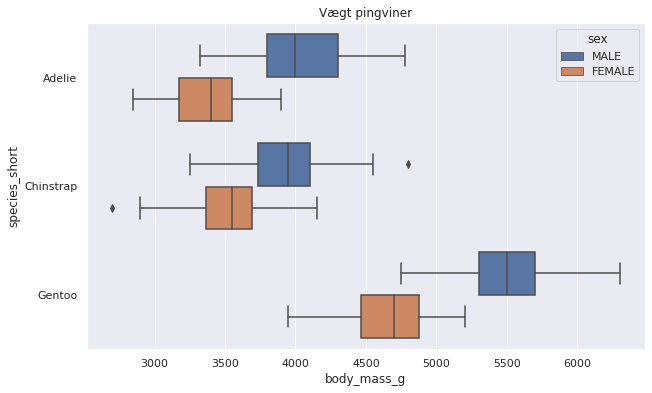

In [ ]:
# opdeling på art og køn

# opdeling: han/hun - pingviner

plt.figure(figsize=(10,6))
plt.title('Vægt pingviner')

sns.boxplot(data = penguins[penguins.sex.isin(['MALE', 'FEMALE'])], x = "body_mass_g", y = "species_short" , hue = "sex")

Kan vi bruge flere "datapunkter" som input til vores visualisering? Yes! Vi kan prøve at lave et histogram.

Lad os prøve at udvikle et histogram først fra bunden.


In [ ]:
#Vi kan skære vores data i intervaller (som aldersgrupper i Titanic)

penguins_cat = pd.cut(penguins.body_mass_g, bins = 15) #vi gemmer det i en ny "Series" udenfor vores penguins DataFrame

In [ ]:
# og sådan ser det ud hvis vi tæller hvor mange pingviner der findes inden for grupperne
penguins_cat.value_counts(sort=False)

(2696.4, 2940.0]     8
(2940.0, 3180.0]    14
(3180.0, 3420.0]    34
(3420.0, 3660.0]    45
(3660.0, 3900.0]    49
(3900.0, 4140.0]    27
(4140.0, 4380.0]    27
(4380.0, 4620.0]    25
(4620.0, 4860.0]    28
(4860.0, 5100.0]    22
(5100.0, 5340.0]    13
(5340.0, 5580.0]    20
(5580.0, 5820.0]    13
(5820.0, 6060.0]     8
(6060.0, 6300.0]     1
Name: body_mass_g, dtype: int64

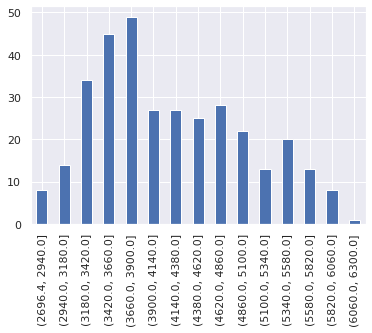

In [ ]:
# og så kan vi lige plotte det (bare ved at bruge pandas indbyggede plot funktioner)
penguins_cat.value_counts(sort=False).plot(kind='bar')

[Text(0.5, 0, 'Vægt i g')]

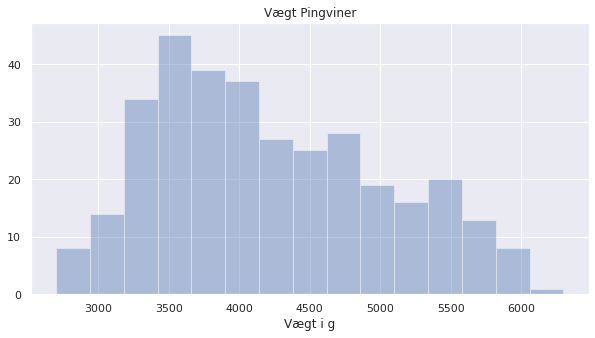

In [ ]:
# Det kan også gøres nemmere

plt.figure(figsize=(10,5))
plt.title('Vægt Pingviner')

g = sns.distplot(penguins.body_mass_g, hist = True, kde = False, bins=15)

g.set(xlabel='Vægt i g')

[Text(0.5, 0, 'Vægt i g')]

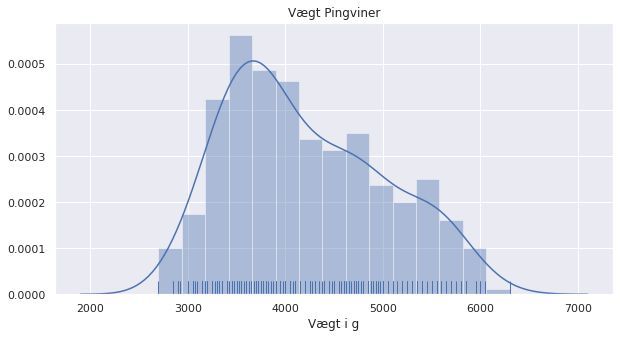

In [ ]:
# Her tilføjer vi lige KDE og rug
plt.figure(figsize=(10,5))
plt.title('Vægt Pingviner')

g = sns.distplot(penguins.body_mass_g, hist = True, kde = True, rug=True, bins=15)

g.set(xlabel='Vægt i g')

Text(0.5, 1.0, 'Vægt pingviner')

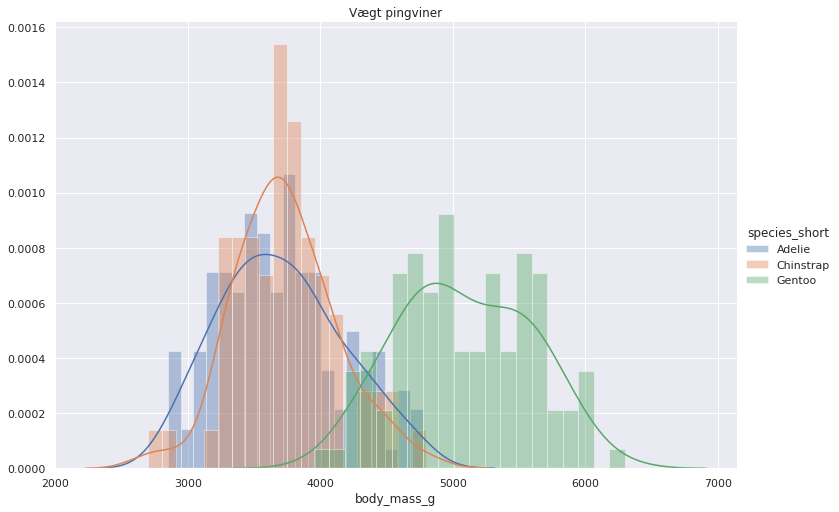

In [ ]:
# Og så kan vi lige lave 3 histogrammer i en plot

g = sns.FacetGrid(penguins, hue="species_short", height=7, aspect=1.5)
g = g.map(sns.distplot, "body_mass_g", bins=20)
g.add_legend()
plt.title('Vægt pingviner')

## Varians og standard-afvigelse
I dette afsnit vil vi kigge nærmere på fordelingen af observationer. I de ovenstående afsnit kunne man gennem, blandt andet, boxplot og swarmplot se, at nogle af observationerne i data havde relativt stor afstand til de resterende punkter. Disse observationer er meget normale i det meste data, og bliver beskrevet som outliers. 

Selvom gennemsnit ofte kan give et fint indblik i hvordan en variabel fordeler sig, kan outliers have stor påvirkning på et gennemsnit. Spredningen er afgørende for hvor stor *usikkerhed* der er i målene for centrale tendenser, eksempelvis gennemsnit. 

Her vil i blive præsenteret for **varians** og **standardafvigelse**, to metoder til at vurdere spredning af data. 

---

**Varians** er betegnet som gennemsnittet af de kvadrerede afvigelser fra middelværdien


In [ ]:
# Manuel måde at udregne varians
# Note: kun for at vise hvordan det ser ud "under the hood". Som i kan se, giver numpy's funktion samme output, og er meget simplere.
diff = penguins.body_mass_g-penguins.body_mass_g.mean()
diff_sq = diff**2
varians_ex = diff_sq.mean()
varians_ex

645821.7901771307

In [ ]:
# Med numpy's indbyggede funktion
varians_np = np.var(penguins.body_mass_g)
varians_np

645821.7901771307

In [ ]:
# OBS: Pandas antager at man arbejder med nøgletal for stikprøve

penguins.body_mass_g.var(ddof=0)

645821.7901771307

Eftersom variansen viser de kvadrerede afvigelser, bliver tallet i dette tilfælde meget højt. Vi er interesserede i at finde den gennemsnitlige spredning for observationerne i en variabel. Den kan vi finde ved at udregne kvadratroden af variansen, også kendt som standardafvigelsen. 
**Standardafvigelsen** er altså den gennemsnitlige afstand fra middelværdien i en variabel. 

In [ ]:
# Igen er den manuelle udregning medført, for at vise hvad der foregår når i anvender den hurtige løsning fra numpy: np.std()
std_ex = np.sqrt(varians_np)
print(std_ex)

803.6303815667566


In [ ]:
# Numpy's funktion for standardafvigelse
# Note: læg mærke til at man kalder den oprindelige variabel i np.std(). man behøver derfor ikke at udregne variansen manuelt når man kun er interesseret i standardafvigelsen til videre analyser. 
# variansen er inddraget her for at vise den manuelle metode til at udføre de matematiske formler der ligger til grund for de funktioner i anvender i Python/excel
std_np = np.std(penguins.body_mass_g)
std_np

803.6303815667566

In [ ]:
# Eller i hverdagsbrug:

penguins.body_mass_g.std() #Stikprøve

804.836129253923

In [ ]:
penguins.body_mass_g.std(ddof=0)

803.6303815667566

#### Øvelse: I ovenstående eksempel lærte vi, at den gennemsnitlige vægtvariation mellem alle pingviner er ca. 800 gram. Find standardafvigelsen for hver af de tre pingvinarter. 

Hint: groupby er meget alsidig, se hvad der sker hvis man kalder std() i forlængelse af grupperingen. 

In [ ]:
#muligt svar 1
adelie = penguins[penguins.species_short == 'Adelie']

In [ ]:
adelie.body_mass_g.std(ddof=0)

457.0468191507876

In [ ]:
# bedste svar/ hurtigste. 
# note ddof er degrees of freedom. Svar med default ddof(1) bliver også accepteret
penguins.groupby('species_short').body_mass_g.std(ddof=0)

species_short
Adelie       457.046819
Chinstrap    381.498621
Gentoo       497.672316
Name: body_mass_g, dtype: float64

## Øvelse!

Går tilbage til kickstarter data og bruge standardafvigelsen som værktøj til at argumentere følgende:

Lav et subset uden outliers til højre (kun store værdier), hvor betingelsen er: outlier >= Q3 + 1.5*IQR.

Herfra:

Comics, design, music og games er de projektkategorier, hvor vi kan se den største mangfoldighed mht beløb, som bliver pledged (usd_pledged_real).

Design, journalism og food er dog i toppen, hvis vi kun ser på projekter, som kommer igennem.

## Bivariat analyse
Ind til videre har vi som udgangspunkt bearbejdet enkelte variable som udgangspunkt for analyse og visualisering. I dette afsnit vil i blive introduceret for *bivariat* analyse, hvor man undersøger sammenhængen mellem to variable i et datasæt. Her vil i, blandt andet, blive introduceret for *kovarians* og *Pearson's korrelations koefficient*.

---

Som det første vil i blive introduceret for, hvordan man visualiserer fordelingen mellem to variable. Denne visualisering opstilles i en graf ved at sætte en variabel på x-aksen og en variabel på y-aksen. Her opdeles datasættets observationer i grafen, alt efter hvordan de placerer sig i mellem variablen x og variablen y. Dette kaldes et *scatter plot*

In [ ]:
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 30.9+ KB


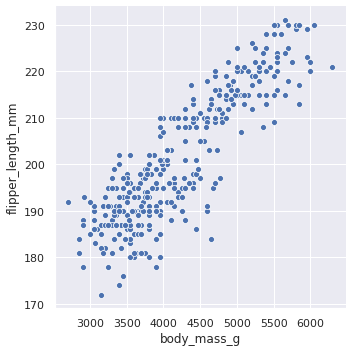

In [ ]:
# Med Seaborn
sns.relplot(x="body_mass_g", y="flipper_length_mm", data=penguins);

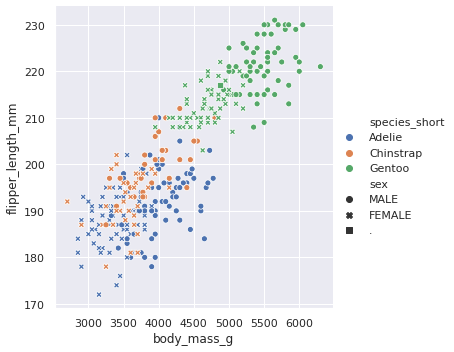

In [ ]:
# Seaborn does it fancy
sns.relplot(x="body_mass_g", y="flipper_length_mm", hue="species_short", style="sex", data=penguins)

In [ ]:
# (avanceret) stats import
import scipy.stats as stats

In [ ]:
penguins['flipper_length_normalized'] = stats.zscore(penguins.flipper_length_mm)

In [ ]:
penguins['body_mass_normalized']  = stats.zscore(penguins.body_mass_g)

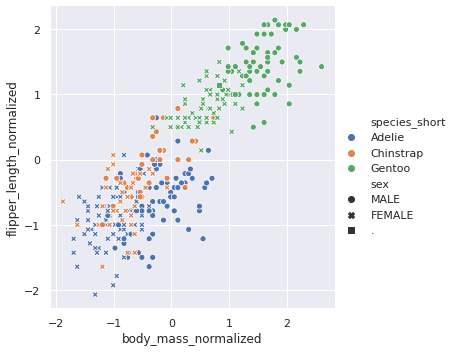

In [ ]:
sns.relplot(x = 'body_mass_normalized', y = 'flipper_length_normalized', hue="species_short", style="sex", data=penguins )

#### Kovarians
Kovarians er et mål for sammenhængen mellem to skaleringsafhængige variable - altså, hvor meget en variabel vil ændres når en anden variabel ændres.  

In [ ]:
# Kovarians matrix med pandas
penguins[['body_mass_g', 'flipper_length_mm']].cov()

,body_mass_g,flipper_length_mm
body_mass_g,647761.194952,9854.668816
flipper_length_mm,9854.668816,196.621397


In [ ]:
# Kovarians
penguins.body_mass_g.cov(penguins.flipper_length_mm)

9854.668815522105

#### Korrelations koefficient (Pearson's R)
Eftersom kovarians er udregnet med baggrund i de givne variables skalering, giver det ikke analytisk mening at udlede indsigt fra kovariansen alene. Man anvender derfor korrelations koefficienten til at standardisere værdierne i variablene. 

Korrelations koefficienten vil altid have en værdi mellem -1 og 1. Hvis koefficienten er tæt på 1 vil der være en *positiv* sammenhæng mellem x og y (når x stiger, stiger y også). Hvis koefficienten er tæt på -1 vil der være en *negativ* sammenhæng mellem x og y (når x stiger, falder y). Værdier tæt på 0 indikerer at der er lav eller ingen sammenhæng mellem x og y (når x stiger, gør y hvad den vil). 

In [ ]:
# Pandas .corr() kan anvendes til at vurdere korrelationen mellem samtlige numeriske variable i et datasæt. 
penguins.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


In [ ]:
# Korrelations matrix med pandas
# Note: Der er forskellige måder at udregne korrelation, hvor Pearson's er den mest udbredte. 
# Pandas .corr() har pearson som default, men kan ændres efter behov.
penguins[['body_mass_g', 'flipper_length_mm']].corr(method='pearson')

,body_mass_g,flipper_length_mm
body_mass_g,1.000000,0.873211
flipper_length_mm,0.873211,1.000000


In [ ]:
# Pearson's R (korrelations koefficient)
penguins.body_mass_g.corr(penguins.flipper_length_mm)

0.8732109665376445

In [ ]:
# Ud med de normaliserede igen
penguins = penguins.drop(['body_mass_normalized', 'flipper_length_normalized'], axis = 'columns')

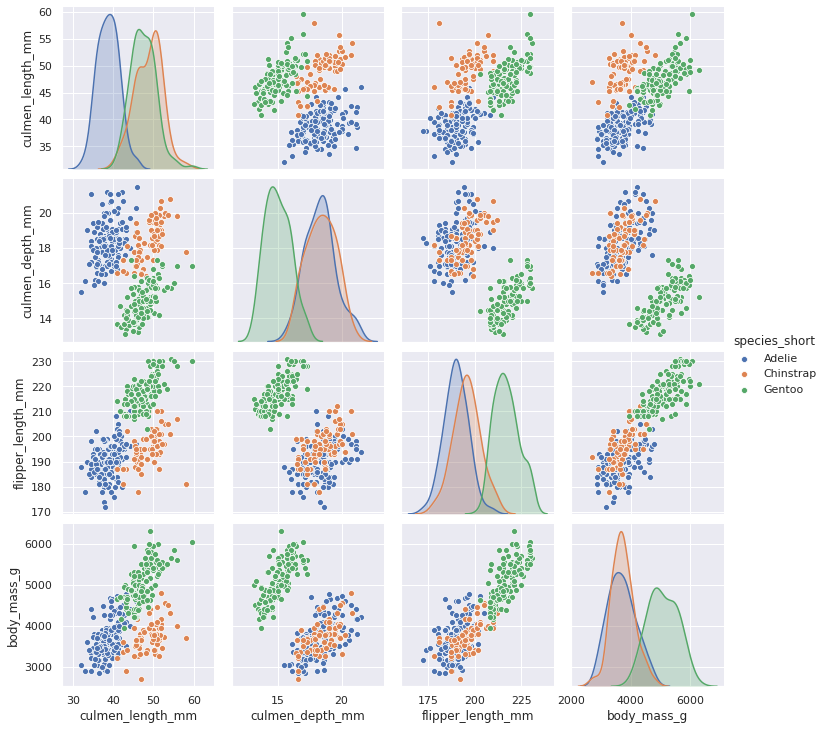

In [ ]:
sns.pairplot(penguins, hue="species_short")

### Klasseøvelse
Udregn korrelations koefficient for næblængde ift. næbdybde for samtlige observationer og for hver af de 3 racer - Visualiser det i et scatterplot. 

##### Løsning 

###### Svar 1

In [ ]:
penguins.culmen_length_mm.corr(penguins.culmen_depth_mm)

-0.2286399780569594

###### Svar 2

In [ ]:
penguins.groupby('species_short').culmen_length_mm.corr(penguins.culmen_depth_mm)

species_short
Adelie       0.385813
Chinstrap    0.653536
Gentoo       0.644085
Name: culmen_length_mm, dtype: float64

###### Svar 3

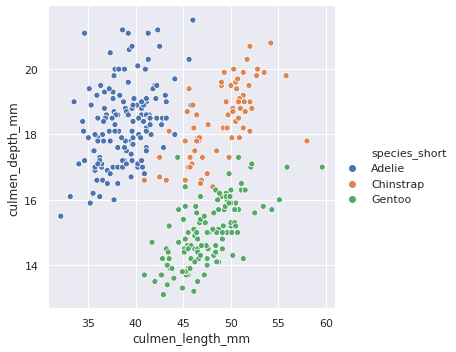

In [ ]:
sns.relplot(x="culmen_length_mm", y="culmen_depth_mm", hue="species_short", data=penguins);